# Business Goal
Prediksi Harga Rumah di Jabodetabek Menggunakan Linear Regression



## Latar Belakang
Shacent mengalami kesulitan dalam memprediksi harga rumah di tiga daerah utama Jabodetabek: Jakarta, Depok, dan Tangerang. Untuk membantu Shacent, kami akan membuat aplikasi yang mampu memprediksi harga rumah berdasarkan beberapa fitur input seperti lokasi, luas tanah, luas bangunan, banyaknya ruangan, dan banyaknya lantai.

## Tujuan
Membuat model Linear Regression yang dapat memprediksi harga rumah dengan akurasi tinggi berdasarkan dataset, dengan fokus pada fitur-fitur yang relevan.

## Langkah-Langkah
1. **Persiapan Data**
   - Mengimpor pustaka yang diperlukan
   - Mengimpor datasets
   - Melakukan pembersihan data termasuk penanganan outlier, data kosong, dan duplikat

2. **Eksplorasi Data**
   - Menggunakan teknik visualisasi untuk memahami distribusi data
   - Menampilkan statistik deskriptif dari dataset

3. **Membangun Model**
   - Memisahkan dataset menjadi fitur dan target
   - Membagi data menjadi set latih dan uji
   - Melatih model Linear Regression
   - Mengevaluasi model menggunakan metrik seperti R-Squared (R²)

Sumber Dataset : https://github.com/Shacent/Labti-Workshop/blob/main/Dataset/Harga%20Rumah%20-%20Workshop%20Labti.csv

# Prep

## Import Lib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Datasets

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Shacent/Labti-Workshop/main/Dataset/Harga%20Rumah%20-%20Workshop%20Labti.csv')

In [ ]:
df.head(10)

,Unnamed: 0,Location,Land Size,Building Size,Num Rooms,Num Floors,Price ($)
0,0,Jakarta,152.0,97.0,4.0,1.0,2273941.27
1,1,Jakarta,142.0,130.0,4.0,1.0,2546611.98
2,2,Jakarta,64.0,52.0,6.0,3.0,1660826.83
3,3,Depok,156.0,70.0,4.0,3.0,2261600.00
4,4,Depok,121.0,109.0,9.0,1.0,2861315.00
5,5,Jakarta,70.0,58.0,7.0,2.0,1838335.34
6,6,Jakarta,152.0,140.0,9.0,3.0,3266574.32
7,7,Jakarta,171.0,64.0,3.0,2.0,1940639.25
8,8,Tangerang,124.0,118.0,9.0,1.0,2896632.09
9,9,Jakarta,137.0,125.0,6.0,2.0,2728025.15


# Data Desc

In [ ]:
print("Jumlah Baris Data :", df.shape[0])
print("Jumlah Kolom Data :", df.shape[1])

Jumlah Baris Data : 10005
Jumlah Kolom Data : 7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10121 entries, 0 to 10120
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     10121 non-null  int64  
 1   Location       10103 non-null  object 
 2   Land Size      10098 non-null  float64
 3   Building Size  10103 non-null  float64
 4   Num Rooms      10104 non-null  float64
 5   Num Floors     10098 non-null  float64
 6   Price ($)      10104 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 553.6+ KB


In [ ]:
df.isna().sum()

Unnamed: 0        0
Location         18
Land Size        23
Building Size    18
Num Rooms        17
Num Floors       23
Price ($)        17
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.describe()

,Unnamed: 0,Land Size,Building Size,Num Rooms,Num Floors,Price ($)
count,10005.000000,10005.000000,10005.000000,10005.000000,10005.000000,1.000500e+04
mean,5064.291154,124.904848,93.554723,5.543628,2.002899,2.566111e+06
std,2920.902529,43.298077,35.635844,2.272610,0.819648,1.856199e+06
min,0.000000,50.000000,38.000000,2.000000,1.000000,9.133309e+05
25%,2537.000000,87.000000,64.000000,4.000000,1.000000,1.935732e+06
50%,5068.000000,125.000000,88.000000,6.000000,2.000000,2.345933e+06
75%,7597.000000,162.000000,118.000000,8.000000,3.000000,2.798569e+06
max,10120.000000,199.000000,197.000000,9.000000,3.000000,2.926503e+07


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['Unnamed: 0', 'Location', 'Land Size', 'Building Size', 'Num Rooms',
       'Num Floors', 'Price ($)'],
      dtype='object')

In [ ]:
df.drop(columns='Unnamed: 0', inplace=True)
df

,Location,Land Size,Building Size,Num Rooms,Num Floors,Price ($)
0,Jakarta,152.0,97.0,4.0,1.0,2273941.27
1,Jakarta,142.0,130.0,4.0,1.0,2546611.98
2,Jakarta,64.0,52.0,6.0,3.0,1660826.83
3,Depok,156.0,70.0,4.0,3.0,2261600.00
4,Depok,121.0,109.0,9.0,1.0,2861315.00
...,...,...,...,...,...,...
10116,Jakarta,149.0,130.0,5.0,3.0,2754685.11
10117,Jakarta,50.0,38.0,4.0,1.0,1158304.36
10118,Jakarta,52.0,40.0,6.0,3.0,1518050.20
10119,Tangerang,82.0,70.0,5.0,3.0,1847271.69


# EDA

In [ ]:
df.columns

Index(['Location', 'Land Size', 'Building Size', 'Num Rooms', 'Num Floors',
       'Price ($)'],
      dtype='object')

## Univariate Analyst

<ipython-input-19-4790db35add9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Location', data=df, palette='pastel')


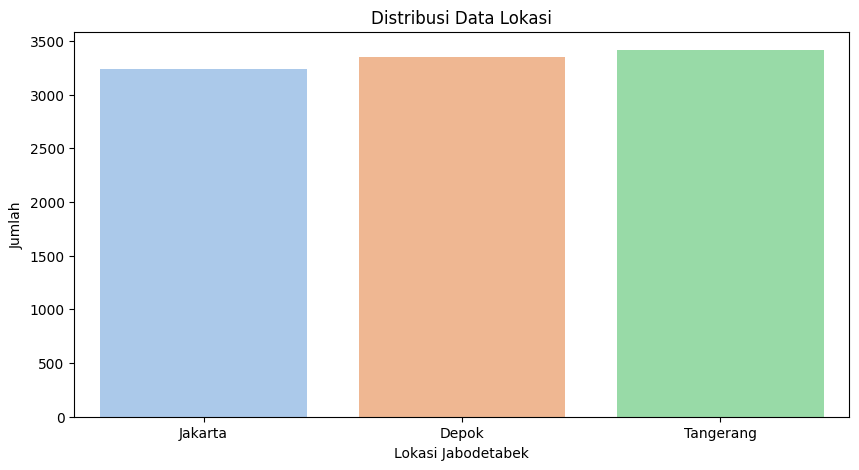

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Location', data=df, palette='pastel')
plt.title('Distribusi Data Lokasi')
plt.xlabel('Lokasi Jabodetabek')
plt.ylabel('Jumlah')
plt.show()

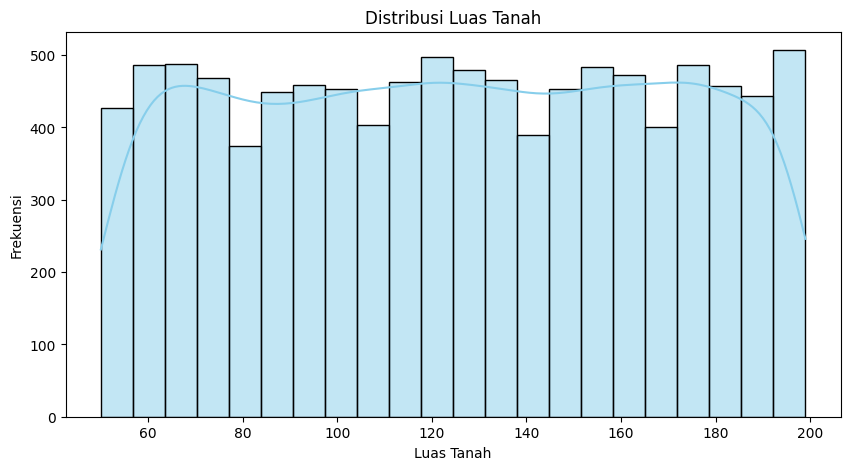

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Land Size'], kde=True, color='skyblue')
plt.title('Distribusi Luas Tanah')
plt.xlabel('Luas Tanah')
plt.ylabel('Frekuensi')
plt.show()

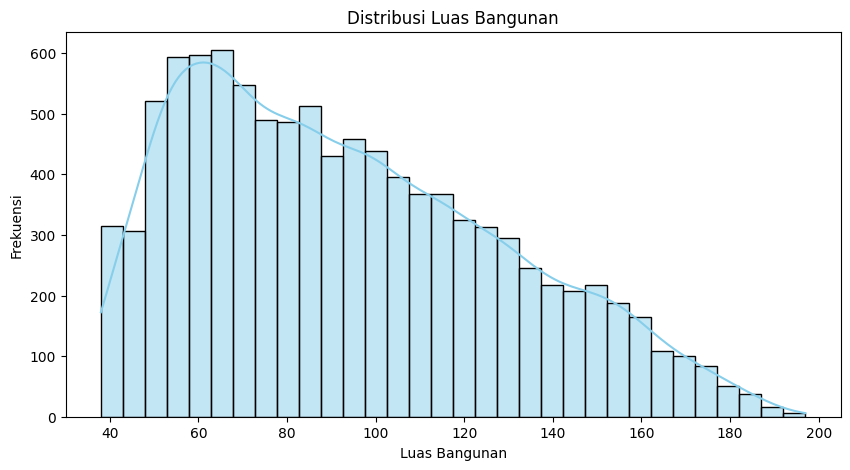

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Building Size'], kde=True, color='skyblue')
plt.title('Distribusi Luas Bangunan')
plt.xlabel('Luas Bangunan')
plt.ylabel('Frekuensi')
plt.show()

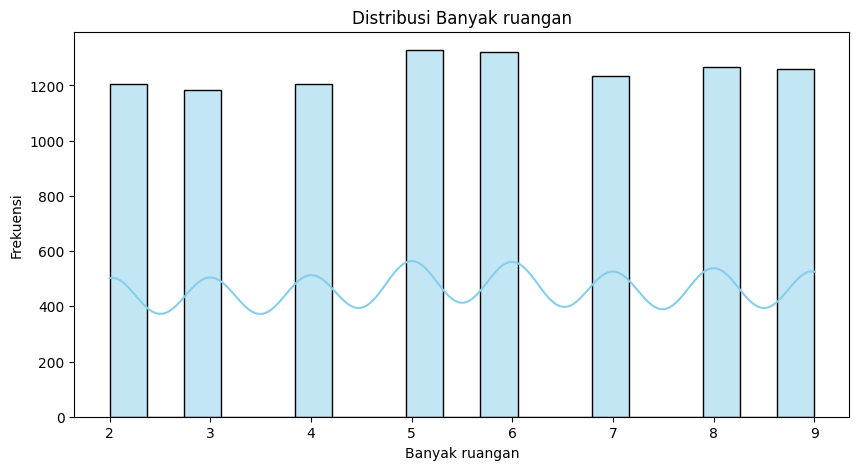

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Num Rooms'], kde=True, color='skyblue')
plt.title('Distribusi Banyak ruangan')
plt.xlabel('Banyak ruangan')
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
df.columns

Index(['Location', 'Land Size', 'Building Size', 'Num Rooms', 'Num Floors',
       'Price ($)'],
      dtype='object')

<ipython-input-27-366d7b2661b0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Num Floors', data=df, palette='pastel')


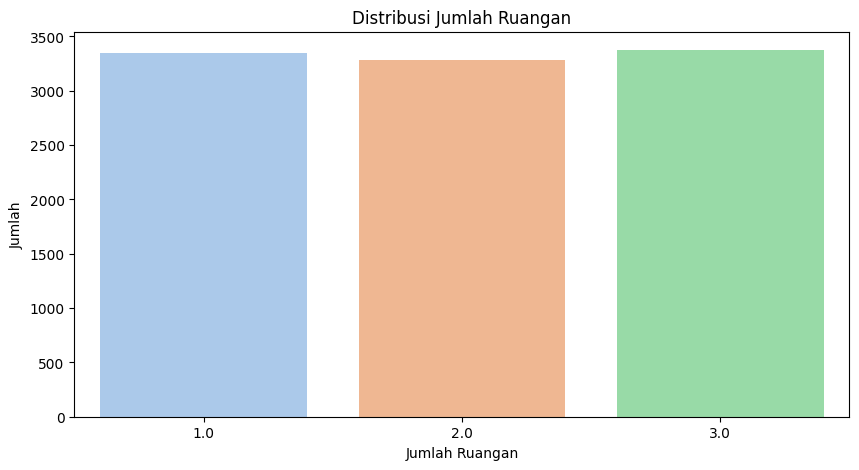

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Num Floors', data=df, palette='pastel')
plt.title('Distribusi Jumlah Ruangan')
plt.xlabel('Jumlah Ruangan')
plt.ylabel('Jumlah')
plt.show()

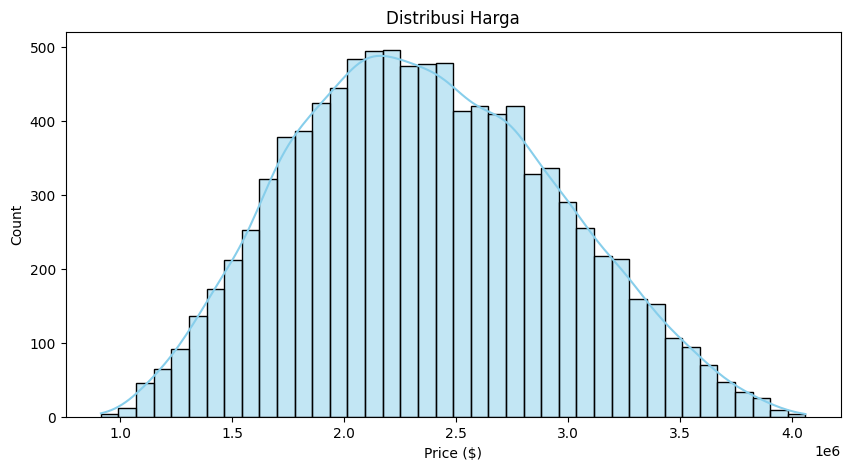

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Price ($)'], kde=True, color='skyblue')
plt.title('Distribusi Harga')
plt.show()

## Bivariate Analyst

<ipython-input-38-06b29d5897fc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Location', y='Price ($)', data=df, palette='pastel')


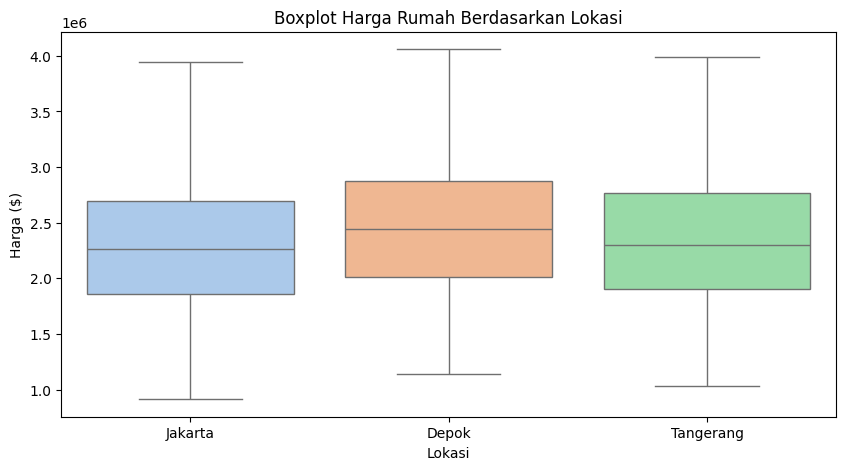

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Location', y='Price ($)', data=df, palette='pastel')
plt.title('Boxplot Harga Rumah Berdasarkan Lokasi')
plt.xlabel('Lokasi')
plt.ylabel('Harga ($)')
plt.show()

<ipython-input-37-5779ddbd1ba9>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Land Size', y='Price ($)', data=df, palette='pastel')


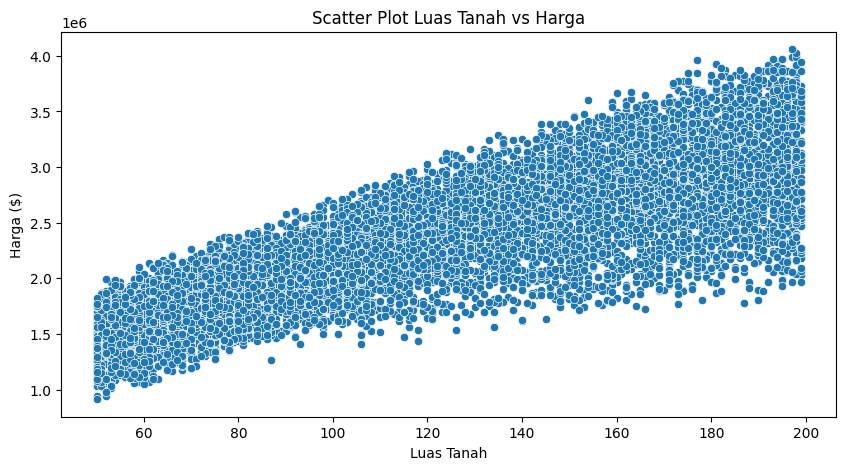

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Land Size', y='Price ($)', data=df, palette='pastel')
plt.title('Scatter Plot Luas Tanah vs Harga')
plt.xlabel('Luas Tanah')
plt.ylabel('Harga ($)')
plt.show()

<ipython-input-36-f260e6122918>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Num Rooms', y='Price ($)', data=df, palette='pastel')


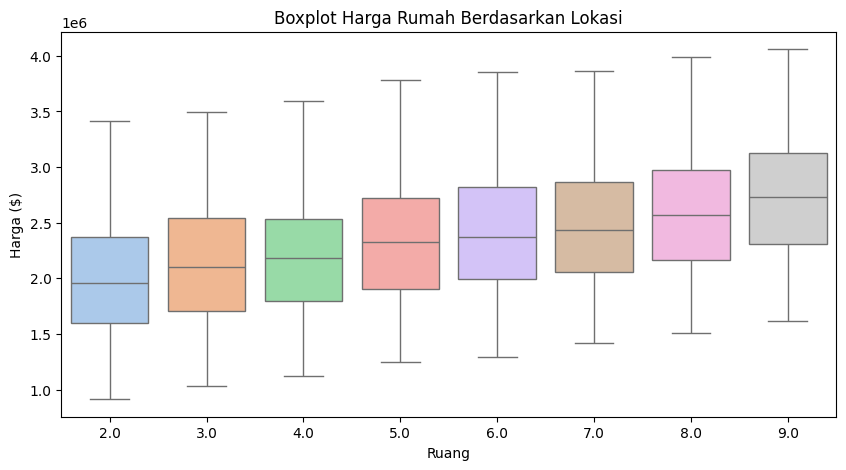

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Num Rooms', y='Price ($)', data=df, palette='pastel')
plt.title('Boxplot Harga Rumah Berdasarkan Lokasi')
plt.xlabel('Ruang')
plt.ylabel('Harga ($)')
plt.show()

<ipython-input-35-1bcfcf9e4ebe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Num Floors', y='Price ($)', data=df, palette='pastel')


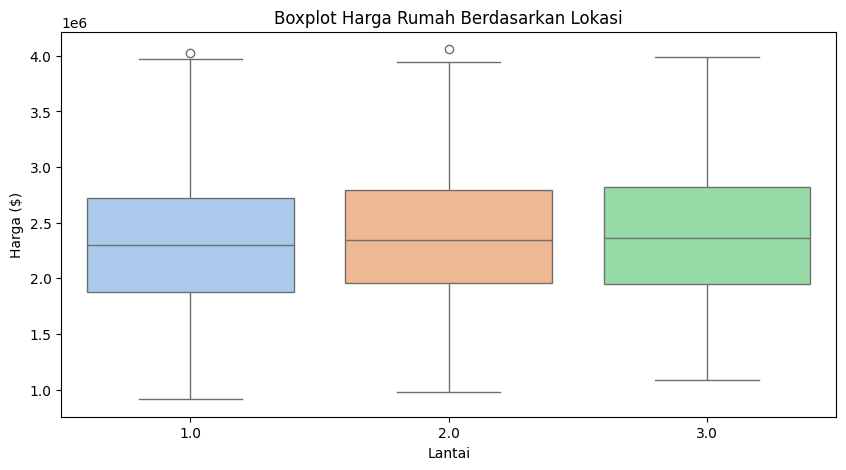

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Num Floors', y='Price ($)', data=df, palette='pastel')
plt.title('Boxplot Harga Rumah Berdasarkan Lokasi')
plt.xlabel('Lantai')
plt.ylabel('Harga ($)')
plt.show()

## Outliers Handling

In [ ]:
Q1 = df['Price ($)'].quantile(0.25)
Q3 = df['Price ($)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Price ($)'] >= lower_bound) & (df['Price ($)'] <= upper_bound)]



## Multivariate Analyst

In [ ]:
df.Location

0          Jakarta
1          Jakarta
2          Jakarta
3            Depok
4            Depok
           ...    
10116      Jakarta
10117      Jakarta
10118      Jakarta
10119    Tangerang
10120        Depok
Name: Location, Length: 9857, dtype: object

In [ ]:
location_dict = {"Jakarta" : 0, "Depok" : 1, "Tangerang" : 2}
df['Location'] = df['Location'].map(location_dict)

<ipython-input-42-54f79ba01b31>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = df['Location'].map(location_dict)


In [ ]:
df

,Location,Land Size,Building Size,Num Rooms,Num Floors,Price ($)
0,0,152.0,97.0,4.0,1.0,2273941.27
1,0,142.0,130.0,4.0,1.0,2546611.98
2,0,64.0,52.0,6.0,3.0,1660826.83
3,1,156.0,70.0,4.0,3.0,2261600.00
4,1,121.0,109.0,9.0,1.0,2861315.00
...,...,...,...,...,...,...
10116,0,149.0,130.0,5.0,3.0,2754685.11
10117,0,50.0,38.0,4.0,1.0,1158304.36
10118,0,52.0,40.0,6.0,3.0,1518050.20
10119,2,82.0,70.0,5.0,3.0,1847271.69


In [ ]:
df.corr()

,Location,Land Size,Building Size,Num Rooms,Num Floors,Price ($)
Location,1.000000,-0.000496,0.008791,-0.012175,-0.007999,0.035230
Land Size,-0.000496,1.000000,0.699476,0.005212,-0.013624,0.797564
Building Size,0.008791,0.699476,1.000000,0.000999,-0.010473,0.869009
Num Rooms,-0.012175,0.005212,0.000999,1.000000,0.000481,0.390579
Num Floors,-0.007999,-0.013624,-0.010473,0.000481,1.000000,0.059696
Price ($),0.035230,0.797564,0.869009,0.390579,0.059696,1.000000


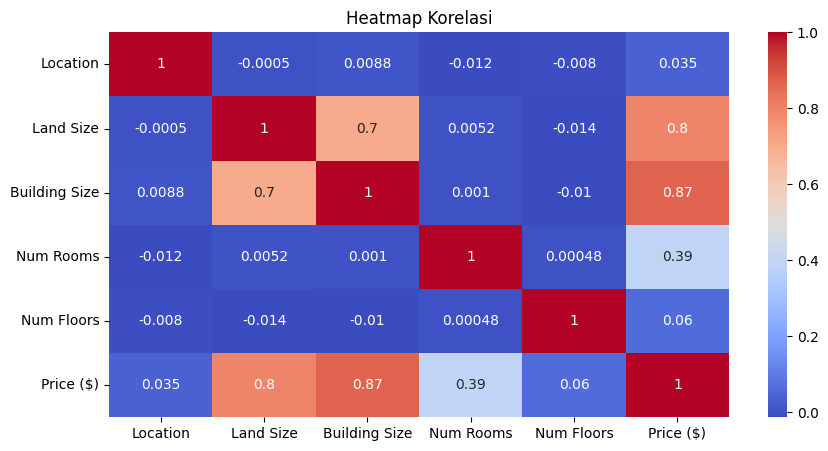

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

## Feature Engineering

In [ ]:
df['Land_Building_Rasio'] = df['Land Size'] / (df['Building Size'] + 1)

<ipython-input-47-34c042840bcc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Land_Building_Rasio'] = df['Land Size'] / (df['Building Size'] + 1)


In [ ]:
df

,Location,Land Size,Building Size,Num Rooms,Num Floors,Price ($),Land_Building_Rasio
0,0,152.0,97.0,4.0,1.0,2273941.27,1.551020
1,0,142.0,130.0,4.0,1.0,2546611.98,1.083969
2,0,64.0,52.0,6.0,3.0,1660826.83,1.207547
3,1,156.0,70.0,4.0,3.0,2261600.00,2.197183
4,1,121.0,109.0,9.0,1.0,2861315.00,1.100000
...,...,...,...,...,...,...,...
10116,0,149.0,130.0,5.0,3.0,2754685.11,1.137405
10117,0,50.0,38.0,4.0,1.0,1158304.36,1.282051
10118,0,52.0,40.0,6.0,3.0,1518050.20,1.268293
10119,2,82.0,70.0,5.0,3.0,1847271.69,1.154930


# Build Model

In [ ]:
X = df[['Location', 'Land Size', 'Building Size', 'Num Rooms', 'Num Floors', 'Land_Building_Rasio']]
y = df['Price ($)']

## Split Data Model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## LR

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-Squared:", r2)

R-Squared: 0.9828301428002779


# Lazy Predict

In [ ]:
pip install lazypredict

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [ ]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [01:14<00:00,  1.76s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 578
[LightGBM] [Info] Number of data points in the train set: 7885, number of used features: 6
[LightGBM] [Info] Start training from score 2358748.129788


In [ ]:
print(models)

                               Adjusted R-Squared  R-Squared       RMSE  \
Model                                                                     
HistGradientBoostingRegressor                1.00       1.00   34417.46   
LGBMRegressor                                1.00       1.00   34613.08   
XGBRegressor                                 1.00       1.00   38093.97   
GradientBoostingRegressor                    0.99       0.99   41633.51   
ExtraTreesRegressor                          0.99       0.99   42833.60   
RandomForestRegressor                        0.99       0.99   49910.83   
KNeighborsRegressor                          0.99       0.99   52674.53   
BaggingRegressor                             0.99       0.99   54663.19   
TransformedTargetRegressor                   0.98       0.98   76631.03   
LinearRegression                             0.98       0.98   76631.03   
Lars                                         0.98       0.98   76631.03   
LassoLars                

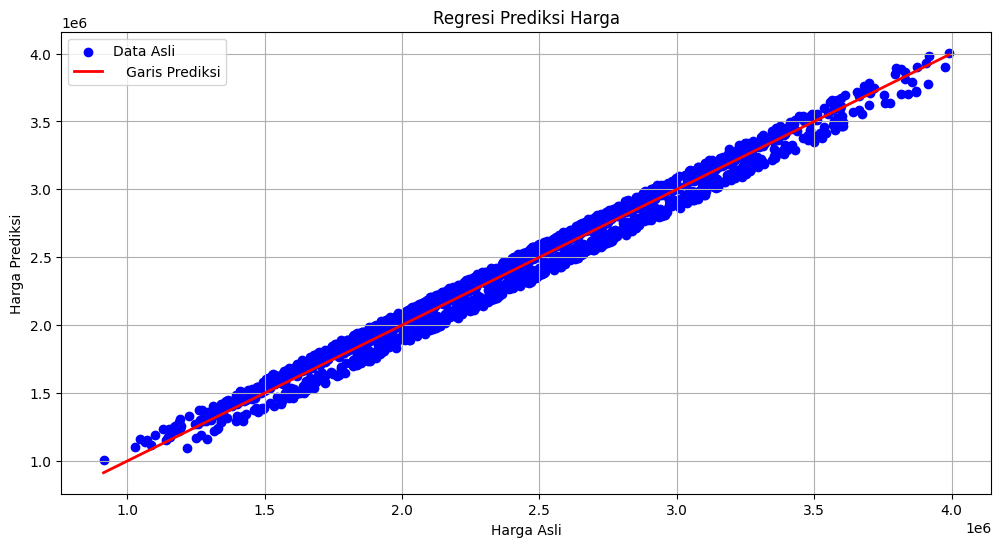

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,y_pred,color='blue',label='Data Asli')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red',linewidth=2, label='   Garis Prediksi')
plt.xlabel('Harga Asli')
plt.ylabel('Harga Prediksi')
plt.legend()
plt.title('Regresi Prediksi Harga')
plt.grid(True)
plt.show()

# Model Evaluation

In [ ]:
threshold_low = 0.93
threshold_high = 1.05

TP = FP = FN = TN = 0

for actual, predicted in zip(y_test, y_pred):
    if actual * threshold_low <= predicted <= actual * threshold_high:
        if predicted >= actual:
            TP += 1
        else:
            TN += 1
    else:
        if predicted > actual:
            FP += 1
        else:
            FN += 1


print("Confusion Matrix")
print("TP:", TP)
print("FP:", FP)
print("FN:", FN)
print("TN:", TN)

Confusion Matrix
TP: 1221
FP: 81
FN: 36
TN: 634


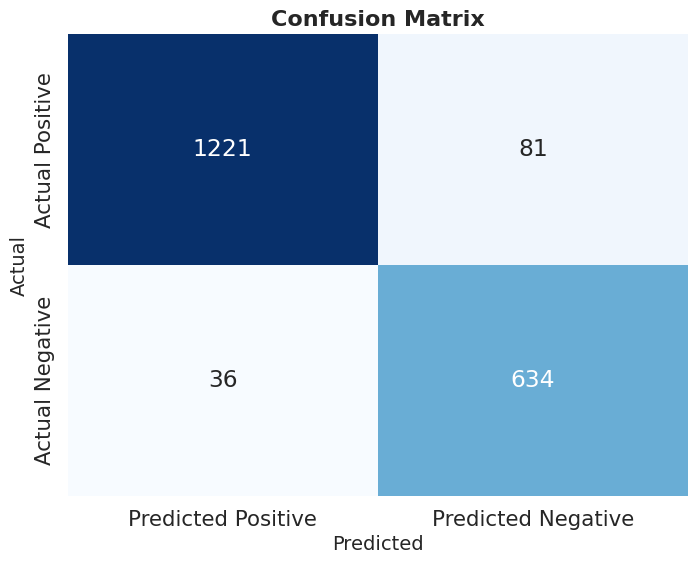

In [ ]:
# Create confusion matrix array
conf_matrix = np.array([[TP, FP],
                        [FN, TN]])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # Adjust to fit better
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Positive', 'Predicted Negative'],
            yticklabels=['Actual Positive', 'Actual Negative'])
plt.title('Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

In [ ]:
accuracy = (TP + TN) / (TP + FP + FN + TN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

Accuracy: 0.9406693711967545
Precision: 0.9377880184331797
Recall: 0.9713603818615751
F1-Score: 0.9542790152403283


# Export Model

In [ ]:
import joblib

joblib.dump(lr, 'lr_model_HousePrice.pkl')

['lr_model_HousePrice.pkl']